# Regressão Logística (um perceptron)

In [1]:
!pip install PyQt5
import numpy as np                                                     # ndarrys for gridded data
import pandas as pd                                                    # DataFrames for tabular data
import matplotlib.pyplot as plt                                        # for plotting
import matplotlib.image as mpimg
import seaborn as sns
import h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
train_file = '/content/drive/MyDrive/ia/train_catvnoncat.h5'
train = h5py.File(train_file, 'r+')

#test: printing keys of train
#print(list(train.keys()))
#test: printing tree of train
#f = nx.nxload(train_file)
#print(f.tree)

Xtrain = train.get('train_set_x')
ytrain = train.get('train_set_y')

#print(Xtrain.shape)
#print(ytrain.shape)

test_file = '/content/drive/MyDrive/ia/test_catvnoncat.h5'
test = h5py.File(test_file, 'r+')

#test: printing keys of train
#print(list(test.keys()))
#test: printing tree of train
#g = nx.nxload(test_file)
#print(g.tree)

Xtest = test.get('test_set_x')
ytest = test.get('test_set_y')

#print(Xtest.shape)
#print(ytest.shape)

Xtrain = np.array(Xtrain[:])
ytrain = np.array(ytrain[:])

ytest = np.array(ytest[:])
Xtest = np.array(Xtest[:])

classes= np.array(train["list_classes"][:])


Xtrain = Xtrain.reshape(Xtrain.shape[0], -1).T/255.
Xtest = Xtest.reshape(Xtest.shape[0], -1).T/255.

ytrain = ytrain.reshape((1, ytrain.shape[0]))
ytest = ytest.reshape((1, ytest.shape[0]))



In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [29]:
def back_propagation(w, b, X, Y):
    m = X.shape[1]

    # FORWARD PROPAGATION
    sig = sigmoid(np.dot(w.T, X) + b)                                 # compute activation
    cost =(-1/m) * np.sum(Y * np.log(sig)+(1-Y) * np.log(1-sig))   # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1/m) * np.dot(X, (sig - Y).T)
    db = (1/m) * np.sum(sig - Y)

    cost = np.squeeze(cost)

    return dw, db, cost

In [25]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "h" predicting the probabilities of a cat being present in the picture
    h = sigmoid(np.dot(w.T, X) + b)
    for i in range(h.shape[1]):
        if(h[0,i] > 0.5):
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0

    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [30]:
EPOCHS = 300
LEARNING_RATE = 0.6

w = np.zeros((Xtrain.shape[0],1))
b = 0

costs = [];
for i in range(EPOCHS):
    dw, db, cost = back_propagation(w, b, Xtrain, ytrain)

    # update rule
    w = w - LEARNING_RATE * dw
    b = b - LEARNING_RATE * db
    costs.append(cost)

# Predict test/train set examples

Y_prediction_test = predict(w, b, Xtest)
Y_prediction_train = predict(w, b, Xtrain)

# Print train/test Errors
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - ytrain)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - ytest)) * 100))

d = {"costs": costs,
     "Y_prediction_test": Y_prediction_test,
     "Y_prediction_train" : Y_prediction_train,
     "w" : w,
     "b" : b,
     "learning_rate" : LEARNING_RATE,
     "num_iterations": EPOCHS}


<ipython-input-29-3f712034fba6>:6: RuntimeWarning: divide by zero encountered in log
  cost =(-1/m) * np.sum(Y * np.log(sig)+(1-Y) * np.log(1-sig))   # compute cost
<ipython-input-29-3f712034fba6>:6: RuntimeWarning: invalid value encountered in multiply
  cost =(-1/m) * np.sum(Y * np.log(sig)+(1-Y) * np.log(1-sig))   # compute cost
<ipython-input-15-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


train accuracy: 65.55023923444976 %
test accuracy: 34.0 %


# Rede de Camada Rasa

## Em primeiro lugar, vamos importar as bibliotecas necessárias.

In [ ]:
!pip install keyboard
!pip install nexusformat
import numpy as np                                                     # ndarrys for gridded data
import pandas as pd                                                    # DataFrames for tabular data
import os                                                              # set working directory, run executables
import matplotlib.pyplot as plt                                        # for plotting
import matplotlib.image as mpimg
import seaborn as sns
import nexusformat.nexus as nx
import h5py
import datetime
import sys
import keyboard

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf              # Importa TF2
from tensorflow import keras         # Importa Keras
from tensorflow.keras import layers  # Ferramentes do Keras mais usadas para acesso mais rápido
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical



print(tf.__version__)                # Deve retornar "2.0.0" ou versão mais recente


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.12.0


##Carregando a Base de Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_file = '/content/drive/MyDrive/ia/train_catvnoncat.h5'
train = h5py.File(train_file, 'r+')

#test: printing keys of train
#print(list(train.keys()))
#test: printing tree of train
#f = nx.nxload(train_file)
#print(f.tree)

Xtrain = train.get('train_set_x')
ytrain = train.get('train_set_y')

print(Xtrain.shape)
print(ytrain.shape)


test_file = '/content/drive/MyDrive/ia/test_catvnoncat.h5'
test = h5py.File(test_file, 'r+')

#test: printing keys of train
#print(list(test.keys()))
#test: printing tree of train
#g = nx.nxload(test_file)
#print(g.tree)

Xtest = test.get('test_set_x')
ytest = test.get('test_set_y')

print(Xtest.shape)
print(ytest.shape)


(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)


Após carregar os dados, podemos ver que temos 60.000 casos para treinamento e 10.000 casos para teste do modelo (no caso, a rede neural)

Os valores de cada "pixel" da imagem variam entre 0 e 255. Vamos **normalizar** estes dados dividindo tudo por 255.

In [ ]:
Xtrain = Xtrain[:]/255.0
Xtest = Xtest[:]/255.0

# Mostrando alguns exemplos de imagens de Gatos e Não Gatos

(64, 64, 3)


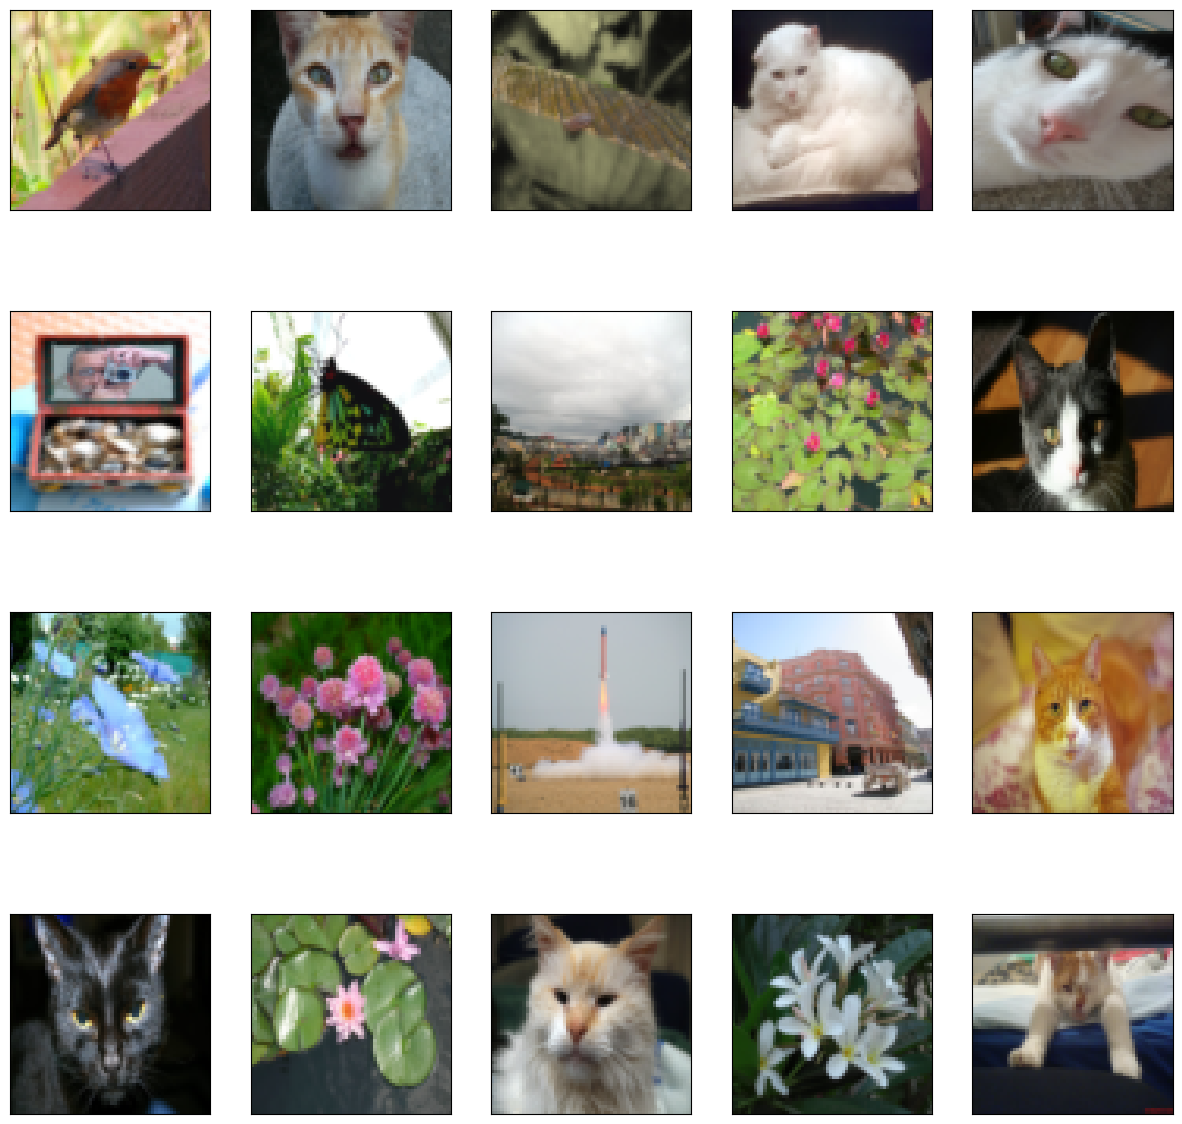

In [ ]:
print(Xtrain[1].shape)
n=20
plt.figure(figsize=(15, 15))
for i in range(n):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(Xtrain[i+10])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
#Fazendo o one-hot-encoding da variável de saída

num_classes = 2 #0 and 1 are the possible results: 0 for non-cat and 1 for cat
ytrain = to_categorical(ytrain, num_classes)
ytest = to_categorical(ytest, num_classes)

In [ ]:
PRINT_MODEL_SUMMARY = True

In [ ]:
#Treinando o Modelo

#Montando o modelo da rede neural
modelo = tf.keras.Sequential()
modelo.add(layers.Flatten())
modelo.add(layers.Dense(40, kernel_initializer="random_uniform", bias_initializer="random_uniform", activation="tanh"))
modelo.add(layers.Dense(num_classes, kernel_initializer="random_uniform", bias_initializer="random_uniform", activation="softmax"))

opt = tf.keras.optimizers.SGD(learning_rate=0.020)
modelo.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

input_shape = Xtrain.shape
modelo.build(input_shape)

if PRINT_MODEL_SUMMARY:
  modelo.summary()

#Criando um Conjunto de Validação

Xtr,Xval,ytr,yval = train_test_split(Xtrain,ytrain,test_size = 0.3)
num_train = np.size(Xtr,0)
#print(num_train)

results = modelo.fit(Xtr, ytr, validation_data = (Xval, yval), batch_size = num_train, epochs=500, verbose=0)

In [ ]:
#Treinando modelo com Callback
modelo = tf.keras.Sequential()
modelo.add(layers.Flatten())
modelo.add(layers.Dense(400, kernel_initializer="random_uniform", bias_initializer="random_uniform", activation="tanh"))
modelo.add(layers.Dense(num_classes, kernel_initializer="random_uniform", bias_initializer="random_uniform", activation="softmax"))

opt = tf.keras.optimizers.SGD(learning_rate=0.02)
modelo.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# This callback will stop the training when there is no improvement in
# the loss for ten consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

log_dir = os.path.join( "logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#Criando um Conjunto de Validação

Xtr,Xval,ytr,yval = train_test_split(Xtrain,ytrain,test_size = 0.3)
num_train = np.size(Xtr,0)
#print(num_train)

results = modelo.fit(Xtr, ytr, validation_data = (Xval, yval), batch_size = num_train, epochs=500, callbacks=[callback, tensorboard_callback], verbose=0)

In [ ]:
modelo.add(layers.Flatten())
modelo.add(layers.Dense(900, kernel_initializer="random_uniform", bias_initializer="random_uniform", activation="tanh"))
modelo.add(layers.Dense(num_classes, kernel_initializer="random_uniform", bias_initializer="random_uniform", activation="softmax"))

opt = tf.keras.optimizers.SGD(learning_rate=0.02)
modelo.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

#Criando um Conjunto de Validação

# This callback will stop the training when the loss reachs a minimum for validation data
# for fifty consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='auto')

modelo = tf.keras.Sequential()

Xtr,Xval,ytr,yval = train_test_split(Xtrain,ytrain,test_size = 0.3)
num_train = np.size(Xtr,0)
#print(num_train)

results = modelo.fit(Xtr, ytr, validation_data = (Xval, yval), batch_size = num_train, epochs=2000, callbacks=[callback], verbose=0)

In [ ]:
def exp_decay(epoch):
   initial_lrate = 1.0
   k = 0.0005
   lrate = initial_lrate * np.exp(-k*epoch)
   return lrate

lrate = tf.keras.callbacks.LearningRateScheduler(exp_decay)

# This callback will stop the training when the loss reachs a minimum for validation data
# for fifty consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

modelo = tf.keras.Sequential()
modelo.add(layers.Flatten())
modelo.add(layers.Dense(400, kernel_initializer="random_uniform", bias_initializer="random_uniform", activation="sigmoid"))
modelo.add(layers.Dense(num_classes, kernel_initializer="random_uniform", bias_initializer="random_uniform", activation="softmax"))

opt = tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9)
modelo.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

Xtr,Xval,ytr,yval = train_test_split(Xtrain,ytrain,test_size = 0.3)
num_train = np.size(Xtr,0)
#print(num_train)

results = modelo.fit(Xtr, ytr, validation_data = (Xval, yval), batch_size = num_train, epochs=2000, callbacks=[callback, lrate], verbose=0)


Epoch 68: early stopping


In [ ]:
# This callback will stop the training when the loss reachs a minimum for validation data
# for fifty consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

modelo = tf.keras.Sequential()
modelo.add(layers.Flatten())
modelo.add(layers.Dense(100, kernel_initializer="random_uniform", bias_initializer="random_uniform", activation="tanh"))
modelo.add(layers.Dense(num_classes, kernel_initializer="random_uniform", bias_initializer="random_uniform", activation="softmax"))

opt = tf.keras.optimizers.SGD(learning_rate=0.07)
modelo.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

Xtr,Xval,ytr,yval = train_test_split(Xtrain,ytrain,test_size = 0.3)
num_train = np.size(Xtr,0)
#print(num_train)

results = modelo.fit(Xtr, ytr, validation_data = (Xval, yval), batch_size = 1000 , epochs=500, callbacks=[callback], verbose=0)


Epoch 186: early stopping


### Plotando gráficos

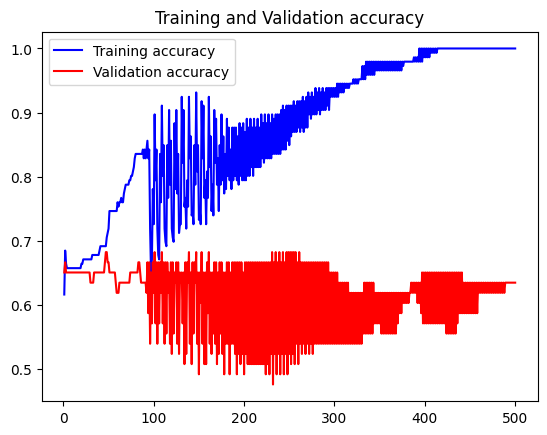

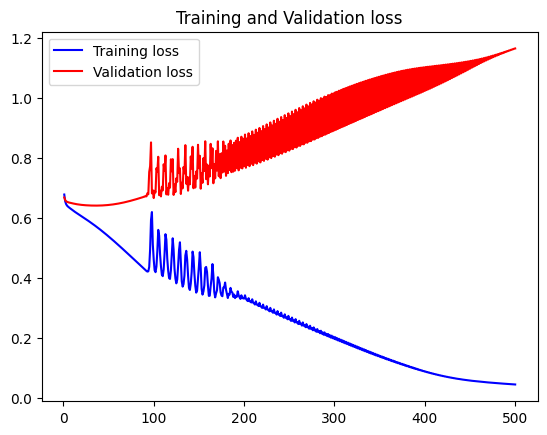

In [ ]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

2/2 [==============================] - 0s 10ms/step

Accuracy: 0.6000



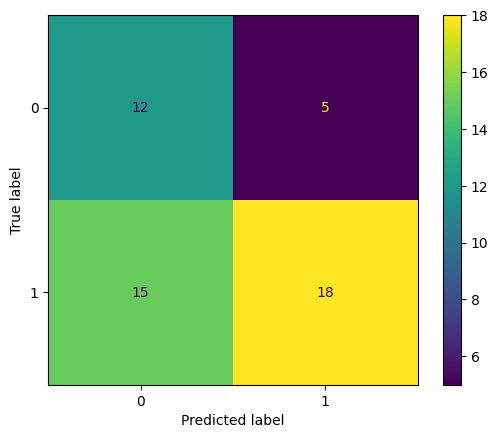

In [ ]:
ytestpred = modelo.predict(Xtest)
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(ytest.argmax(axis=1), ytestpred.argmax(axis=1))))

#Your input to confusion_matrix must be an array of int not one hot encodings.
ConfusionMatrixDisplay.from_predictions(ytest.argmax(axis=1), ytestpred.argmax(axis=1))

## Testando o desempenho

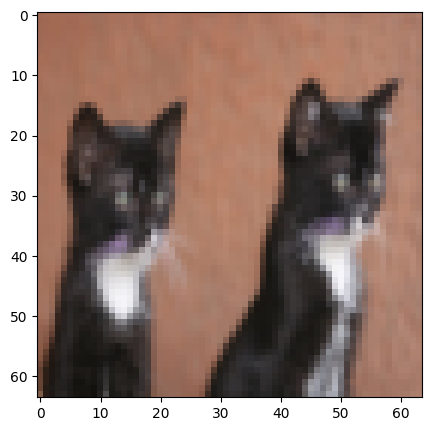

Previsto: 1  Real: 1
Press 'x' to exit.x


In [ ]:
n=50
plt.figure(figsize=(5, 5))
for i in range(n):
    plt.imshow(Xtest[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()
    print('Previsto:',ytestpred[i].argmax(),' Real:',ytest[i].argmax())
    data = input('Press \'x\' to exit.')
    if data=='x':
      break
